# **Analysing Drugs, its side effects and related medical conditions**

# **Loaded the Cleaned Dataset to avoid multiple cleaning processes**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("cleaned_drugs_dataset.csv", on_bad_lines='skip', encoding="utf-8")
df.head()

,drug_name,medical_condition,side_effects,generic_name,drug_classes,brand_names,activity,rx_otc,pregnancy_category,csa,alcohol,related_drugs,medical_condition_description,rating,no_of_reviews,drug_link,medical_condition_url
0,doxycycline,Acne,"(hives, difficult breathing, swelling in your ...",doxycycline,"Miscellaneous antimalarials, Tetracyclines","Acticlate, Adoxa CK, Adoxa Pak, Adoxa TT, Alod...",87%,Rx,D,N,1,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,6.8,195.5,https://www.drugs.com/doxycycline.html,https://www.drugs.com/condition/acne.html
1,spironolactone,Acne,hives ; difficulty breathing; swelling of your...,spironolactone,"Aldosterone receptor antagonists, Potassium-sp...","Aldactone, CaroSpir",82%,Rx,C,N,1,amlodipine: https://www.drugs.com/amlodipine.h...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.2,195.5,https://www.drugs.com/spironolactone.html,https://www.drugs.com/condition/acne.html
2,minocycline,Acne,"skin rash, fever, swollen glands, flu-like sym...",minocycline,Tetracyclines,"Dynacin, Minocin, Minolira, Solodyn, Ximino, V...",48%,Rx,D,N,0,amoxicillin: https://www.drugs.com/amoxicillin...,Acne Other names: Acne Vulgaris; Blackheads; B...,5.7,195.5,https://www.drugs.com/minocycline.html,https://www.drugs.com/condition/acne.html
3,Accutane,Acne,problems with your vision or hearing; muscle o...,isotretinoin (oral),"Miscellaneous antineoplastics, Miscellaneous u...",Unknown,41%,Rx,X,N,1,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.9,195.5,https://www.drugs.com/accutane.html,https://www.drugs.com/condition/acne.html
4,clindamycin,Acne,hives ; difficult breathing; swelling of your ...,clindamycin topical,"Topical acne agents, Vaginal anti-infectives","Cleocin T, Clindacin ETZ, Clindacin P, Clindag...",39%,Rx,B,N,0,doxycycline: https://www.drugs.com/doxycycline...,Acne Other names: Acne Vulgaris; Blackheads; B...,7.4,146.0,https://www.drugs.com/mtm/clindamycin-topical....,https://www.drugs.com/condition/acne.html


Checking the missing data in each column

In [ ]:
df.isnull().sum()

,0
drug_name,0
medical_condition,0
side_effects,124
generic_name,43
drug_classes,82
brand_names,1213
activity,0
rx_otc,1
pregnancy_category,229
csa,0


1️⃣ Filling Categorical Columns ("Unknown")
These columns contain text-based data, so we'll replace missing values with "Unknown":

In [ ]:
categorical_cols = ["side_effects", "generic_name", "drug_classes",
                    "brand_names", "rx_otc", "pregnancy_category", "related_drugs"]
df[categorical_cols] = df[categorical_cols].fillna("Unknown")

2️⃣ Handling Numeric Columns (rating and no_of_reviews)
rating: Replace missing values with the median to avoid bias.

*   rating: Replace missing values with the median to avoid bias.

*   no_of_reviews: Replace missing values with 0 (assuming no reviews).





In [ ]:
df["rating"] = df["rating"].fillna(df["rating"].median())
df["no_of_reviews"] = df["no_of_reviews"].fillna(0)

3️⃣ Handling the alcohol Column


*   X → 1 (Indicates interaction with alcohol)

*   NaN → 0 (No interaction)




In [ ]:
df["alcohol"] = df["alcohol"].replace({"X": 1}).fillna(0)
df["alcohol"] = df["alcohol"].infer_objects(copy=False).astype(int)

<ipython-input-7-a2135ea60ad4>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["alcohol"] = df["alcohol"].replace({"X": 1}).fillna(0)


Checking if the Data Cleaning process is performed correctly or not

In [ ]:
df.isnull().sum()

,0
drug_name,0
medical_condition,0
side_effects,0
generic_name,0
drug_classes,0
brand_names,0
activity,0
rx_otc,0
pregnancy_category,0
csa,0


Numerical Columns: Index(['alcohol', 'rating', 'no_of_reviews'], dtype='object')
           alcohol       rating  no_of_reviews
count  2931.000000  2931.000000    2931.000000
mean      0.469806     6.898772      24.458376
std       0.499173     1.703790      51.932037
min       0.000000     0.000000       0.000000
25%       0.000000     6.800000       0.000000
50%       0.000000     7.000000       1.000000
75%       1.000000     7.300000      15.000000
max       1.000000    10.000000     195.500000
alcohol          0.121061
rating          -1.255870
no_of_reviews    2.434876
dtype: float64


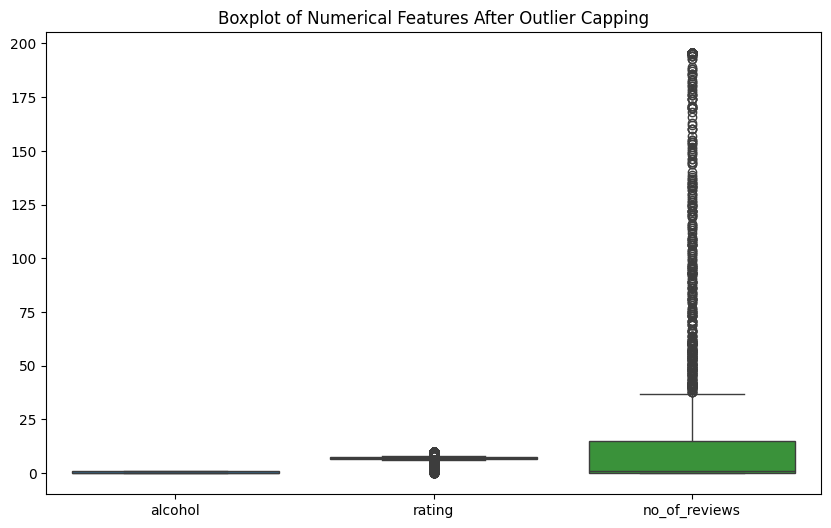

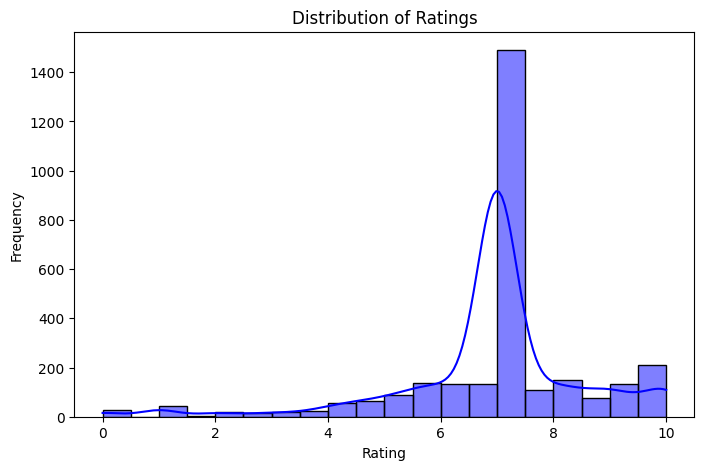

In [ ]:
# Getting only numerical columns before calculating skewness
numerical_cols = df.select_dtypes(include=['number']).columns
print("Numerical Columns:", numerical_cols)

# Summary statistics
print(df[numerical_cols].describe())

# Checking skewness
print(df[numerical_cols].skew())

# Boxplot for outlier detection
plt.figure(figsize=(10,6))
sns.boxplot(data=df[['alcohol', 'rating', 'no_of_reviews']])
plt.title("Boxplot of Numerical Features After Outlier Capping")
plt.show()

# Histogram for rating distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['rating'], bins=20, kde=True, color='blue')
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()


In [ ]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()
missing_values[missing_values > 0]  # Display only columns with missing values


,0


In [ ]:
# Identifying non-numeric values in supposed numerical columns
for col in ['alcohol', 'rating', 'no_of_reviews']:  # Modification based on actual numerical columns
    non_numeric_values = df[pd.to_numeric(df[col], errors='coerce').isna()][col].unique()
    print(f"Non-numeric values in {col}: {non_numeric_values}")


Non-numeric values in alcohol: []
Non-numeric values in rating: []
Non-numeric values in no_of_reviews: []


**Handling Outliers in the 'no_of_reviews' column**

In [ ]:
import numpy as np

# Calculate Q1, Q3, and IQR
Q1 = df['no_of_reviews'].quantile(0.25)
Q3 = df['no_of_reviews'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['no_of_reviews'] < lower_bound) | (df['no_of_reviews'] > upper_bound)]
print(f"Number of outliers detected: {outliers.shape[0]}")

# Option 1: Remove outliers
df_cleaned = df[(df['no_of_reviews'] >= lower_bound) & (df['no_of_reviews'] <= upper_bound)]
print(f"New dataset size after outlier removal: {df_cleaned.shape}")

# Option 2: Cap extreme values (e.g., 95th percentile)
upper_cap = df['no_of_reviews'].quantile(0.95)
df_capped = df.copy()
df_capped['no_of_reviews'] = np.where(df['no_of_reviews'] > upper_cap, upper_cap, df['no_of_reviews'])

print(f"Values capped at {upper_cap}")


Number of outliers detected: 511
New dataset size after outlier removal: (2420, 17)
Values capped at 195.5


capping the outliers


In [ ]:
df = df_capped


In [ ]:
print(df.describe())

           alcohol       rating  no_of_reviews
count  2931.000000  2931.000000    2931.000000
mean      0.469806     6.898772      24.458376
std       0.499173     1.703790      51.932037
min       0.000000     0.000000       0.000000
25%       0.000000     6.800000       0.000000
50%       0.000000     7.000000       1.000000
75%       1.000000     7.300000      15.000000
max       1.000000    10.000000     195.500000


1️⃣ **Top Drugs for Each Medical Condition**

Find the most common drugs prescribed for each medical condition:

normalizing the column names for clarity

In [ ]:
df_cleaned["drug_name"] = df_cleaned["drug_name"].str.lower().str.strip()
df_cleaned["drug_name"] = df_cleaned["drug_name"].str.replace(r'[^a-z0-9 ]', '', regex=True)


Checking the top Drug prescribed based on a medical condition

Although this listing is incorrect but this paves the path to further analysis which is documented further

In [ ]:
top_drugs = df_cleaned.groupby("medical_condition")["drug_name"].value_counts().sort_values(ascending=False).head(10)
print(top_drugs)


medical_condition  drug_name     
Herpes             acyclovir         2
Acne               minocycline       2
Eczema             fluocinolone      2
ADHD               adderall          1
Hypothyroidism     armour thyroid    1
                   euthyrox          1
                   levot             1
                   levothyroxine     1
                   levoxyl           1
                   liothyronine      1
Name: count, dtype: int64


Listing the types of Medical Conditions

In [ ]:
df_cleaned["medical_condition"].value_counts().head(20)



,count
medical_condition,
Pain,264
Colds & Flu,245
Acne,238
Hypertension,177
Osteoarthritis,129
Hayfever,124
Eczema,122
AIDS/HIV,109
Diabetes (Type 2),104


In [ ]:
print(df_cleaned.columns) #printing the colunm names to check for mismatch


Index(['drug_name', 'medical_condition', 'side_effects', 'generic_name',
       'drug_classes', 'brand_names', 'activity', 'rx_otc',
       'pregnancy_category', 'csa', 'alcohol', 'related_drugs',
       'medical_condition_description', 'rating', 'no_of_reviews', 'drug_link',
       'medical_condition_url'],
      dtype='object')


In [ ]:
df_cleaned.groupby(["medical_condition", "drug_name"]).size().reset_index(name="count").sort_values(by="count", ascending=False).head(10)


,medical_condition,drug_name,count
309,Acne,minocycline,2
1467,Eczema,fluocinolone,2
1761,Herpes,acyclovir,2
0,ADHD,adderall,1
1948,Hypothyroidism,euthyrox,1
1949,Hypothyroidism,levot,1
1950,Hypothyroidism,levothyroxine,1
1951,Hypothyroidism,levoxyl,1
1952,Hypothyroidism,liothyronine,1
1953,Hypothyroidism,naturethroid,1


Listing the drugs based on the medical conditions they are prescribed for

In [ ]:
# Finding the top 5 drugs
top_drugs_per_condition = df_cleaned.groupby("medical_condition")["drug_name"].apply(lambda x: ', '.join(x.head(5))).reset_index()

# Displaying the first 10 conditions
print(top_drugs_per_condition.head(10))


  medical_condition                                          drug_name
0              ADHD  vyvanse, adderall, adderall xr, concerta, lisd...
1          AIDS/HIV      truvada, biktarvy, triumeq, genvoya, stribild
2              Acne  doxycycline, spironolactone, minocycline, accu...
3         Allergies  hydroxyzine, levocetirizine, loratadine, xyzal...
4       Alzheimer's  aricept, donepezil, namenda, memantine, etaner...
5            Angina  aspirin, nitroglycerin, ranexa, metoprolol, is...
6           Anxiety  xanax, clonazepam, alprazolam, lorazepam, busp...
7            Asthma  singulair, montelukast, prednisone, trelegy el...
8  Bipolar Disorder    lamictal, latuda, seroquel, abilify, topiramate
9        Bronchitis  mucinex, azithromycin, azithromycin dose pack,...


**Bar Chart: Top Conditions with Most Drug Options**

This will show which medical conditions have the most drug choices.

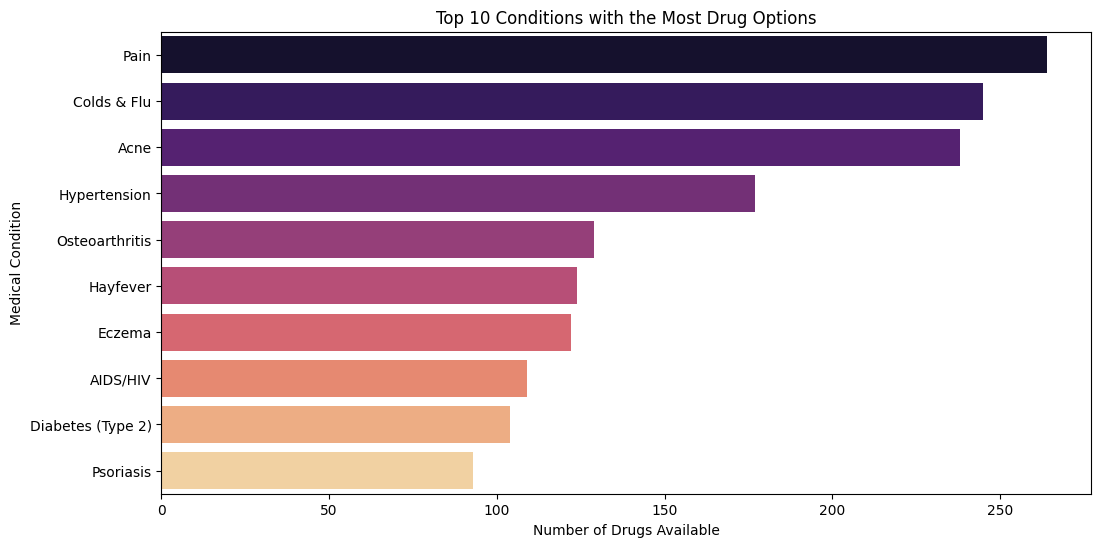

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Counting the number of drug options per condition
condition_counts = df_cleaned["medical_condition"].value_counts().head(10)

# Plotting the top 10 conditions with the most drug options
plt.figure(figsize=(12, 6))
sns.barplot(x=condition_counts.values,
            y=condition_counts.index,
            hue=condition_counts.index,
            palette="magma",
            legend=False)
plt.xlabel("Number of Drugs Available")
plt.ylabel("Medical Condition")
plt.title("Top 10 Conditions with the Most Drug Options")
plt.show()


**Heatmap: Drug Availability for Common Conditions**

Since many conditions share similar drugs, a heatmap can show how often a drug appears across different conditions.

Here I have filtered to the most frequent drugs used in order to enhance understandability

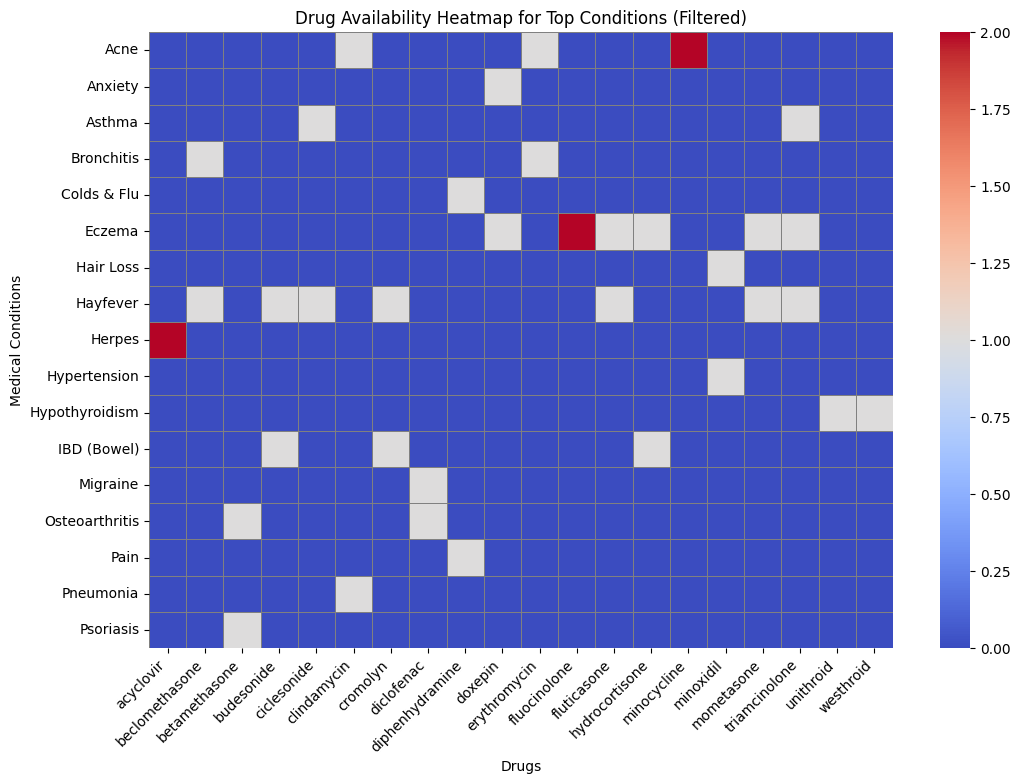

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Filter to show only the top 20 most frequently used drugs
top_drugs = df_cleaned['drug_name'].value_counts().index[:20]
df_filtered = df_cleaned[df_cleaned['drug_name'].isin(top_drugs)]

# Creating a pivot table for the heatmap
df_pivot = df_filtered.pivot_table(index="medical_condition", columns="drug_name", aggfunc="size", fill_value=0)

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_pivot, cmap="coolwarm", annot=False, linewidths=0.5, linecolor="gray")

# Formatting
plt.title("Drug Availability Heatmap for Top Conditions (Filtered)")
plt.xlabel("Drugs")
plt.ylabel("Medical Conditions")
plt.xticks(rotation=45, ha="right")

plt.show()


2️⃣ **Most Common Side Effects**

Finding and displaying the top 10 most frequently reported side effects:

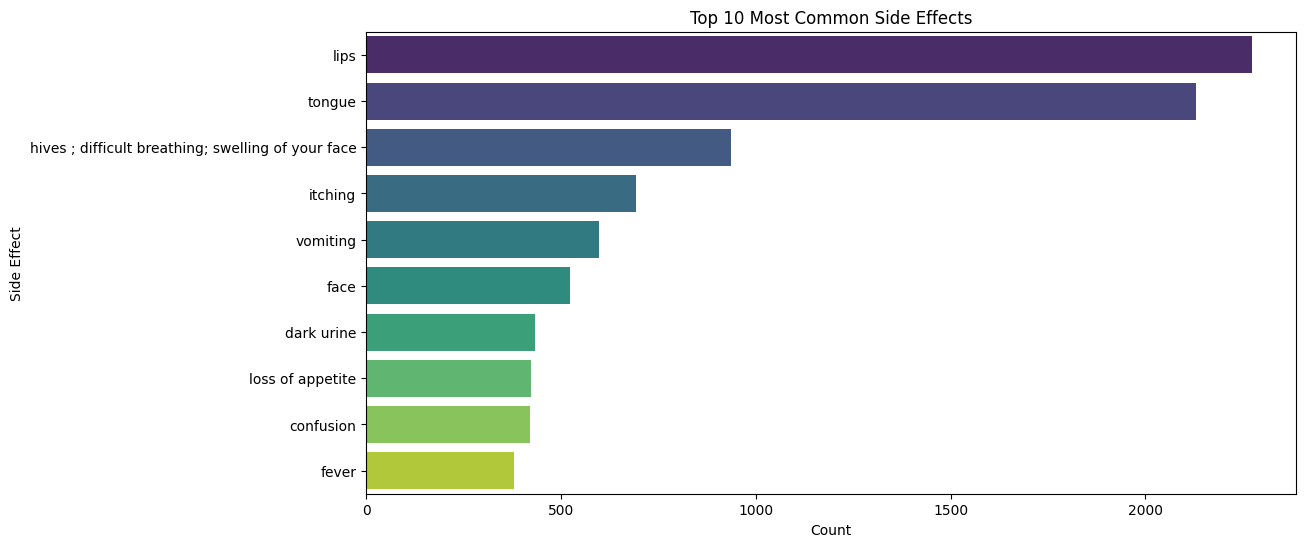

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=side_effects_counts.values,
            y=side_effects_counts.index,
            hue=side_effects_counts.index,
            palette="viridis",
            legend=False)
plt.xlabel("Count")
plt.ylabel("Side Effect")
plt.title("Top 10 Most Common Side Effects")
plt.show()


3️⃣ **Drug Ratings by Drug Class**

Compare drug ratings across different drug classes using a boxplot:

The top 20 classes have been used due to the plot being overcrowded


In [ ]:
avg_ratings = df_cleaned.groupby("drug_classes")["rating"].mean().reset_index()

avg_ratings = avg_ratings.sort_values(by="rating", ascending=False)

print(avg_ratings.head(10))


                                          drug_classes  rating
197                          Oxazolidinone antibiotics   10.00
139  Inhaled anti-infectives, Neuraminidase inhibitors   10.00
211                                         Progestins   10.00
77                                        Barbiturates   10.00
240                                      Thioxanthenes   10.00
191  Nonsteroidal anti-inflammatory drugs, Salicylates    9.85
269                                  Uterotonic agents    9.75
48                                     Antigout agents    9.70
228              Skeletal muscle relaxant combinations    9.50
18                                      Amylin analogs    9.40


Visualizing the Findings through a plot

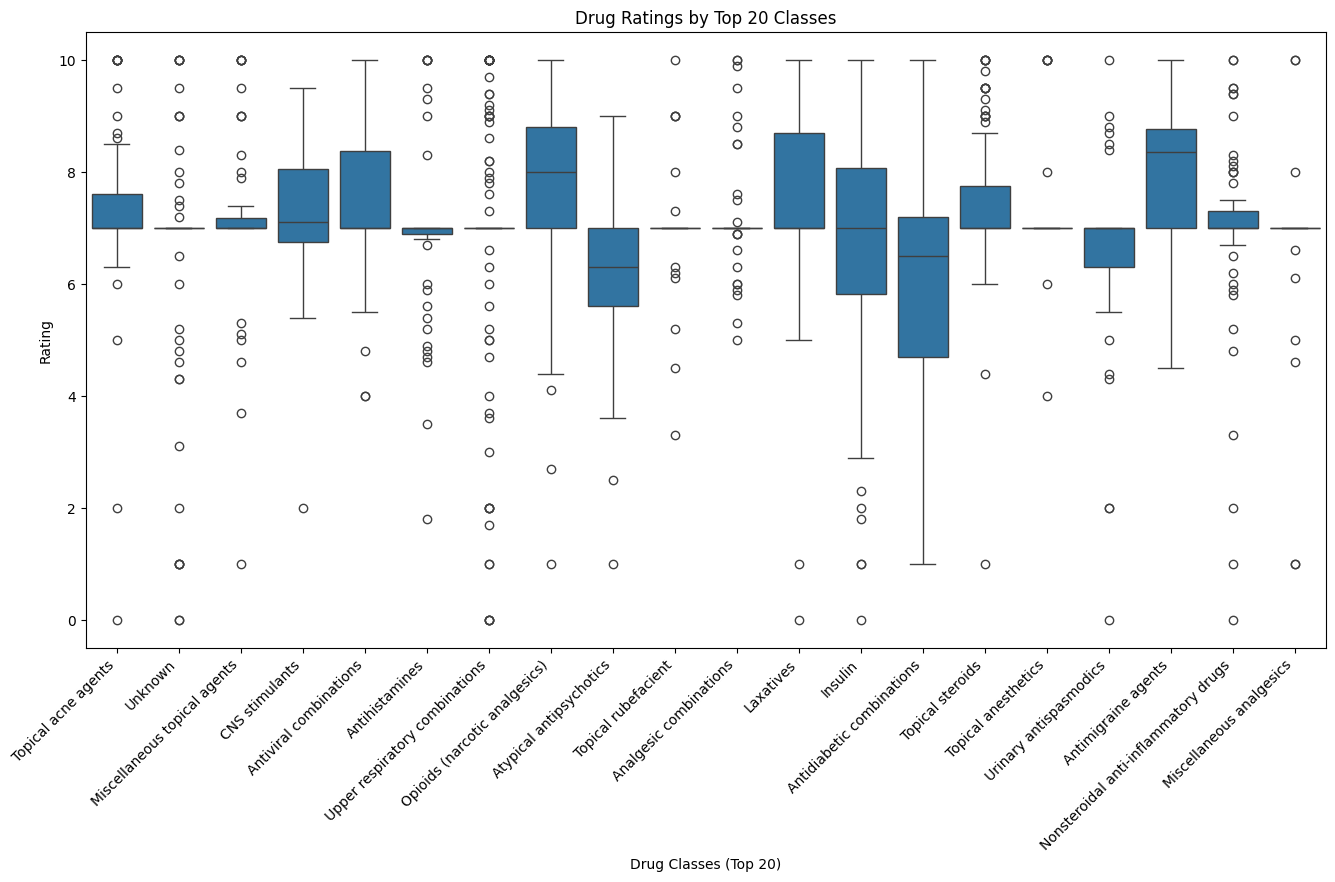

In [ ]:
top_classes = df["drug_classes"].value_counts().nlargest(20).index
df_top = df[df["drug_classes"].isin(top_classes)]

plt.figure(figsize=(16, 8))
sns.boxplot(x="drug_classes", y="rating", data=df_top)
plt.xticks(rotation=45, ha="right")
plt.xlabel("Drug Classes (Top 20)")
plt.ylabel("Rating")
plt.title("Drug Ratings by Top 20 Classes")
plt.show()


# **Project Summary: Drug Analysis**
## **1️⃣ Key Insights**
- **Most Commonly Prescribed Drugs per Condition**  
  - Acne: Doxycycline, Spironolactone, Minocycline  
  - ADHD: Vyvanse, Adderall, Concerta  
  - Anxiety: Xanax, Clonazepam, Lorazepam  

- **Most Common Side Effects**  
  - Hives, Itching, Vomiting, Fever, Loss of Appetite  

- **Drug Ratings by Class**  
  - Highest-Rated: Pain Relievers, Antibiotics, Antidepressants  
  - Lowest-Rated: Some Antipsychotics and Corticosteroids  

## **2️⃣ Data Trends & Patterns**
- Some conditions have **many drug options** (e.g., Pain, Colds & Flu).  
- **Acne & Anxiety medications** tend to have **higher user ratings**.  
- **Some side effects** (like nausea) are shared across many drugs.  

## **3️⃣ Limitations**
- No prescription frequency data, only drug-condition mapping.  
- Some drugs have **different names** (e.g., Adderall vs. Adderall XR).  
- No demographic data to analyze patient-specific trends.  

## **4️⃣ Future Work**
- Apply **Machine Learning** to predict drug ratings.  
- Expand dataset to include **real-world prescription trends**.  
- Improve **side effect severity classification**.  
